net
Net(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)
i= 0  loss=0.702851
i= 20  loss=0.500467
i= 40  loss=0.164726
i= 60  loss=0.004904
i= 80  loss=0.000239


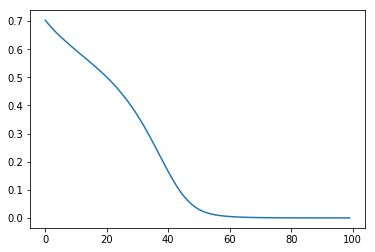

In [6]:
import torch
import torch.nn as nn
import torch.nn.functional as F

import torch.optim as optim
import matplotlib.pyplot as plt

class Net(nn.Module):

    def __init__(self):
        super(Net, self).__init__()   # 继承父类
        # 1 input image channel, 6 output channels, 5x5 square convolution
        # kernel
        self.conv1 = nn.Conv2d(1, 6, 5)
        self.conv2 = nn.Conv2d(6, 16, 5)
        # an affine operation: y = Wx + b
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        # Max pooling over a (2, 2) window
        x = F.max_pool2d(F.relu(self.conv1(x)), (2, 2))
        # If the size is a square you can only specify a single number
        x = F.max_pool2d(F.relu(self.conv2(x)), 2)
        x = x.view(-1, self.num_flat_features(x))
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

    def num_flat_features(self, x):
        size = x.size()[1:]  # all dimensions except the batch dimension
        num_features = 1
        for s in size:
            num_features *= s
        return num_features


net = Net()
print(net)


input=torch.randn(1,1,32,32)

target=torch.randn(10)
target=target.view(1,-1)  # 改变tensor的shape



X=[]
losses=[]
training_steps=100

optimizer=optim.SGD(net.parameters(),lr=0.01)
criterion=nn.MSELoss()
for i in range(training_steps):
    optimizer.zero_grad()
    output=net(input)
    loss=criterion(output,target)
    loss.backward()
    optimizer.step()
    if i %20 ==0:
        print('i= %d  loss=%f'%(i,loss))
    X.append(i)
    losses.append(loss)


plt.plot(X,losses)
# plt.show()